# TASK 3 - To Explore Decision Tree Algorithm

# SUBMITTED BY AAYUSH KUMAR

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris=pd.read_csv('C:\\Users\\win\\Desktop\\Grip Dataset\\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking unique values in the column 'species' 
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Stastical visualization of data

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#making id column as index
iris.set_index(['Id'],inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# checking the Nullvalues 

iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking the correlation between the columns by using Heatmap

Text(0.5, 1.0, "Heatmap of 'Iris_dataset'")

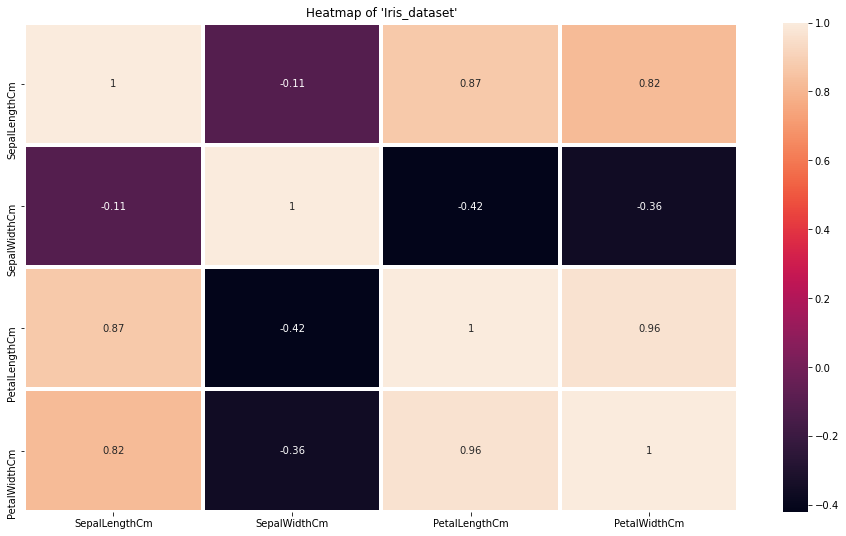

In [7]:
plt.figure(figsize=(16,9))
ax=sns.heatmap(iris.corr(),annot=True,linewidth=3)
plt.title("Heatmap of 'Iris_dataset'")

# Drawing pairplot for better visualization of data distribution

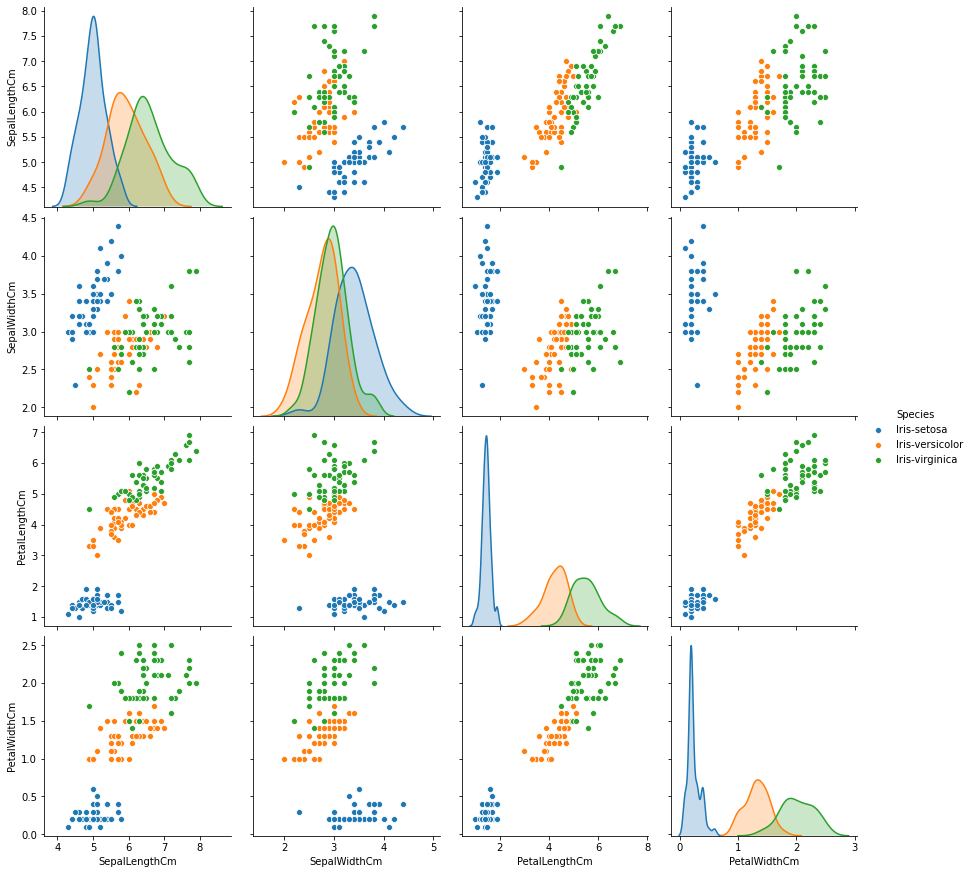

In [8]:
sns.pairplot(iris,diag_kind='kde',hue='Species',height=3)

# preparing the Data

In [9]:
# Droping the species column

# iris.drop(['Species'],axis=1,inplace=True)
# iris.head()

In [10]:
X=iris.drop(['Species'],axis=1).values
y=iris['Species'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [12]:
print("Shape of X_train=",X_train.shape)
print("Shape of X_test=",X_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of X_test=",y_test.shape)

Shape of X_train= (120, 4)
Shape of X_test= (30, 4)
Shape of y_train= (120,)
Shape of X_test= (30,)


In [13]:
from sklearn.tree import DecisionTreeClassifier

dte=DecisionTreeClassifier(criterion='gini',random_state=7)
dte.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [14]:
y_pred=dte.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

# Visualizing Decision Tree


In [15]:
y_pred=dte.predict(X_test)


#visualizing the accuracy of the model
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print('Accuracy of the model',round(acc*100,2),'%')

Accuracy of the model 90.0 %


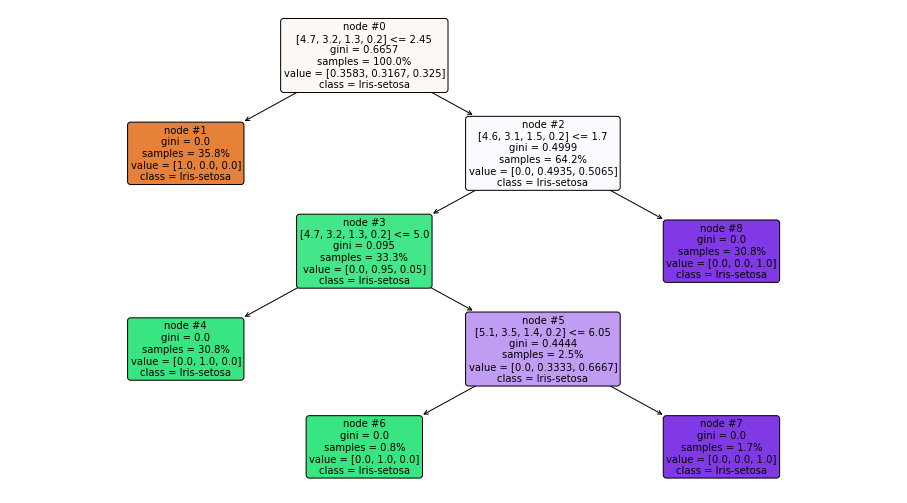

In [16]:
from sklearn.tree import plot_tree


plt.figure(figsize=(16,9))
f_name=X.tolist()
col_name=y.tolist()
tree_image=plot_tree(dte,feature_names=f_name,class_names=col_name,max_depth=5,precision=4,label="all",node_ids=True,
    proportion=True,filled=True,rounded=True,fontsize=10)
plt.savefig('Tree_image')

# Thank you